## Key Requirements for the iRF scikit-learn implementation

* The following is a documentation of the main requirements for the iRF implementation

## Typical Setup


### Import the required dependencies

* In particular `irf_utils` and `irf_jupyter_utils`

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
import numpy as np
from functools import reduce

# Import our custom utilities
from imp import reload
from utils import irf_jupyter_utils
from utils import irf_utils
reload(irf_jupyter_utils)
reload(irf_utils)

<module 'utils.irf_utils' from '/home/runjing_liu/Documents/iRF/scikit-learn-sandbox/jupyter/utils/irf_utils.py'>

## Step 1: Fit the Initial Random Forest

* Just fit every feature with equal weights per the usual random forest code e.g. DecisionForestClassifier in scikit-learn

In [2]:
load_breast_cancer = load_breast_cancer()

In [3]:
X_train, X_test, y_train, y_test, rf = irf_jupyter_utils.generate_rf_example(n_estimators=10)

## Check out the data

In [4]:
print("Training feature dimensions", X_train.shape, sep = ":\n")
print("\n")
print("Training outcome dimensions", y_train.shape, sep = ":\n")
print("\n")
print("Test feature dimensions", X_test.shape, sep = ":\n")
print("\n")
print("Test outcome dimensions", y_test.shape, sep = ":\n")
print("\n")
print("first 5 rows of the training set features", X_train[:2], sep = ":\n")
print("\n")
print("first 5 rows of the training set outcomes", y_train[:2], sep = ":\n")

Training feature dimensions:
(512, 30)


Training outcome dimensions:
(512,)


Test feature dimensions:
(57, 30)


Test outcome dimensions:
(57,)


first 5 rows of the training set features:
[[  1.98900000e+01   2.02600000e+01   1.30500000e+02   1.21400000e+03
    1.03700000e-01   1.31000000e-01   1.41100000e-01   9.43100000e-02
    1.80200000e-01   6.18800000e-02   5.07900000e-01   8.73700000e-01
    3.65400000e+00   5.97000000e+01   5.08900000e-03   2.30300000e-02
    3.05200000e-02   1.17800000e-02   1.05700000e-02   3.39100000e-03
    2.37300000e+01   2.52300000e+01   1.60500000e+02   1.64600000e+03
    1.41700000e-01   3.30900000e-01   4.18500000e-01   1.61300000e-01
    2.54900000e-01   9.13600000e-02]
 [  2.01800000e+01   1.95400000e+01   1.33800000e+02   1.25000000e+03
    1.13300000e-01   1.48900000e-01   2.13300000e-01   1.25900000e-01
    1.72400000e-01   6.05300000e-02   4.33100000e-01   1.00100000e+00
    3.00800000e+00   5.24900000e+01   9.08700000e-03   2.71500000e-02
  

## Step 2: Get all Random Forest and Decision Tree Data

* Extract in a single dictionary the random forest data and for all of it's decision trees
* This is as required for RIT purposes

In [6]:
all_rf_tree_data = irf_utils.get_rf_tree_data(rf=rf,
                                              X_train=X_train, y_train=y_train, 
                                              X_test=X_test, y_test=y_test)



## STEP 3: Get the RIT data and produce RITs

In [11]:
all_rit_tree_data = irf_utils.get_rit_tree_data(
    all_rf_tree_data=all_rf_tree_data,
    bin_class_type=1,
    random_state=12,
    n_estimators=10,
    max_depth=3,
    noisy_split=False,
    num_splits=2)

# Perform Manual CHECKS on the `irf_utils`
* These should be converted to unit tests and checked with `nosetests -v test_irf_utils.py`

# Step 4: Plot some Data

### List Ranked Feature Importances

In [12]:
# Print the feature ranking
print("Feature ranking:")

feature_importances_rank_idx = all_rf_tree_data['feature_importances_rank_idx']
feature_importances = all_rf_tree_data['feature_importances']

for f in range(X_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1
                                   , feature_importances_rank_idx[f]
                                   , feature_importances[feature_importances_rank_idx[f]]))

Feature ranking:
1. feature 20 (0.294270)
2. feature 23 (0.246163)
3. feature 22 (0.095275)
4. feature 7 (0.088542)
5. feature 6 (0.068028)
6. feature 26 (0.034007)
7. feature 27 (0.024631)
8. feature 24 (0.020245)
9. feature 0 (0.015324)
10. feature 28 (0.015231)
11. feature 13 (0.013823)
12. feature 3 (0.009706)
13. feature 1 (0.008211)
14. feature 4 (0.007102)
15. feature 29 (0.006801)
16. feature 25 (0.006115)
17. feature 9 (0.005294)
18. feature 2 (0.005136)
19. feature 10 (0.004665)
20. feature 17 (0.004292)
21. feature 19 (0.003996)
22. feature 12 (0.003848)
23. feature 21 (0.003743)
24. feature 15 (0.003576)
25. feature 5 (0.002950)
26. feature 14 (0.002440)
27. feature 18 (0.001854)
28. feature 16 (0.001778)
29. feature 8 (0.001585)
30. feature 11 (0.001370)


### Plot Ranked Feature Importances

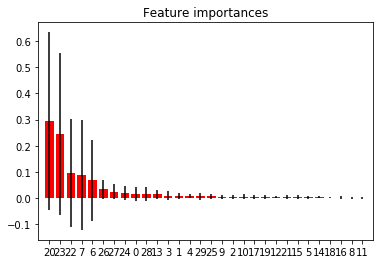

In [13]:
# Plot the feature importances of the forest
feature_importances_std = all_rf_tree_data['feature_importances_std']

plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1])
        , feature_importances[feature_importances_rank_idx]
        , color="r"
        , yerr = feature_importances_std[feature_importances_rank_idx], align="center")
plt.xticks(range(X_train.shape[1]), feature_importances_rank_idx)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Decision Tree 0 (First) - Get output

### Check the output against the decision tree graph

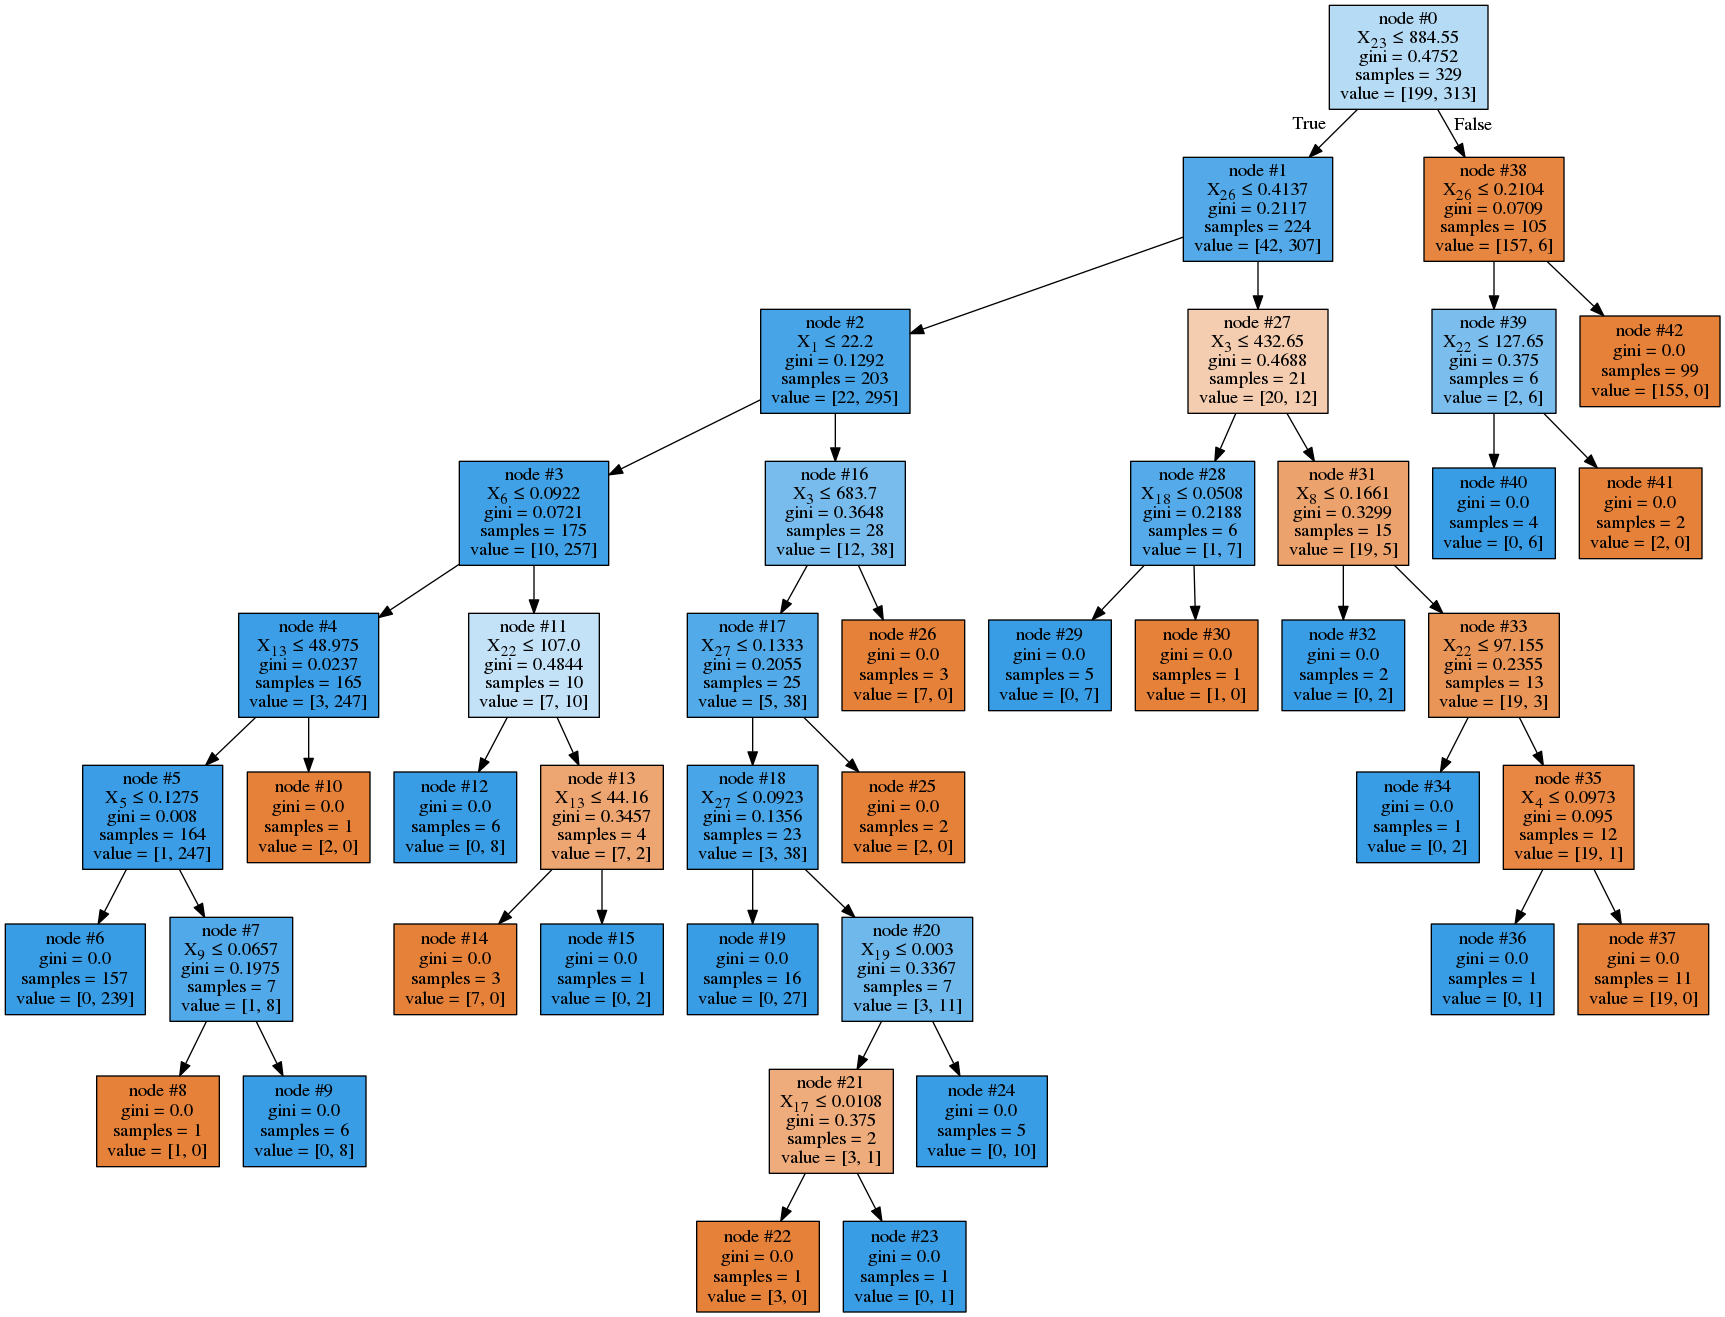

In [14]:
# Now plot the trees individually
irf_jupyter_utils.draw_tree(decision_tree = all_rf_tree_data['rf_obj'].estimators_[0])

## Compare to our dict of extracted data from the tree

In [15]:
irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0'])

{   'all_leaf_node_classes': [   1,
                                 0,
                                 1,
                                 0,
                                 1,
                                 0,
                                 1,
                                 1,
                                 0,
                                 1,
                                 1,
                                 0,
                                 0,
                                 1,
                                 0,
                                 1,
                                 1,
                                 1,
                                 0,
                                 1,
                                 0,
                                 0],
    'all_leaf_node_paths': [   array([0, 1, 2, 3, 4, 5, 6]),
                               array([0, 1, 2, 3, 4, 5, 7, 8]),
                               array([0, 1, 2, 3, 4, 5, 7, 9]),
                  

In [21]:
# Count the number of samples passing through the leaf nodes
sum(all_rf_tree_data['dtree0']['tot_leaf_node_values'])

512

### Check output against the diagram

In [22]:
irf_jupyter_utils.pretty_print_dict(inp_dict = all_rf_tree_data['dtree0']['all_leaf_paths_features'])

[   array([23, 26,  1,  6, 13,  5]),
    array([23, 26,  1,  6, 13,  5,  9]),
    array([23, 26,  1,  6, 13,  5,  9]),
    array([23, 26,  1,  6, 13]),
    array([23, 26,  1,  6, 22]),
    array([23, 26,  1,  6, 22, 13]),
    array([23, 26,  1,  6, 22, 13]),
    array([23, 26,  1,  3, 27, 27]),
    array([23, 26,  1,  3, 27, 27, 19, 17]),
    array([23, 26,  1,  3, 27, 27, 19, 17]),
    array([23, 26,  1,  3, 27, 27, 19]),
    array([23, 26,  1,  3, 27]),
    array([23, 26,  1,  3]),
    array([23, 26,  3, 18]),
    array([23, 26,  3, 18]),
    array([23, 26,  3,  8]),
    array([23, 26,  3,  8, 22]),
    array([23, 26,  3,  8, 22,  4]),
    array([23, 26,  3,  8, 22,  4]),
    array([23, 26, 22]),
    array([23, 26, 22]),
    array([23, 26])]
